# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Dataset Description

In [4]:
df = pd.read_csv('D:/mlproject/notebook/data/stud.csv')

In [5]:
df.shape

(1000, 8)

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


1. Both mean and standard deviation are close to each other.
2. Minimum score for math is 0, while for others it is much higher.

In [9]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

No missing values found.

In [10]:
df.duplicated().sum()

0

No duplicate values found.

In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

# Data Exploration

In [14]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [15]:
for col in cat_cols:
    print(df[col].value_counts())

gender
female    518
male      482
Name: count, dtype: int64
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
test_preparation_course
none         642
completed    358
Name: count, dtype: int64


In [16]:
num_cols = [col for col in df.columns if df[col].dtype != 'O']
num_cols

['math_score', 'reading_score', 'writing_score']

In [20]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [24]:
print('Number of students with full marks in maths', len(df[df['math_score'] == 100]))
print('Number of students with full marks in reading', len(df[df['reading_score'] == 100]))
print('Number of students with full marks in writing', len(df[df['writing_score'] == 100]))

Number of students with full marks in maths 7
Number of students with full marks in reading 17
Number of students with full marks in writing 14


In [25]:
print('Number of students with full marks in maths', len(df[df['math_score'] <= 20]))
print('Number of students with full marks in reading', len(df[df['reading_score'] <= 20]))
print('Number of students with full marks in writing', len(df[df['writing_score'] <= 20]))

Number of students with full marks in maths 4
Number of students with full marks in reading 1
Number of students with full marks in writing 3


Worst performance is in maths   
Best performance is in reading

# Data Visualization

<Axes: xlabel='average', ylabel='Count'>

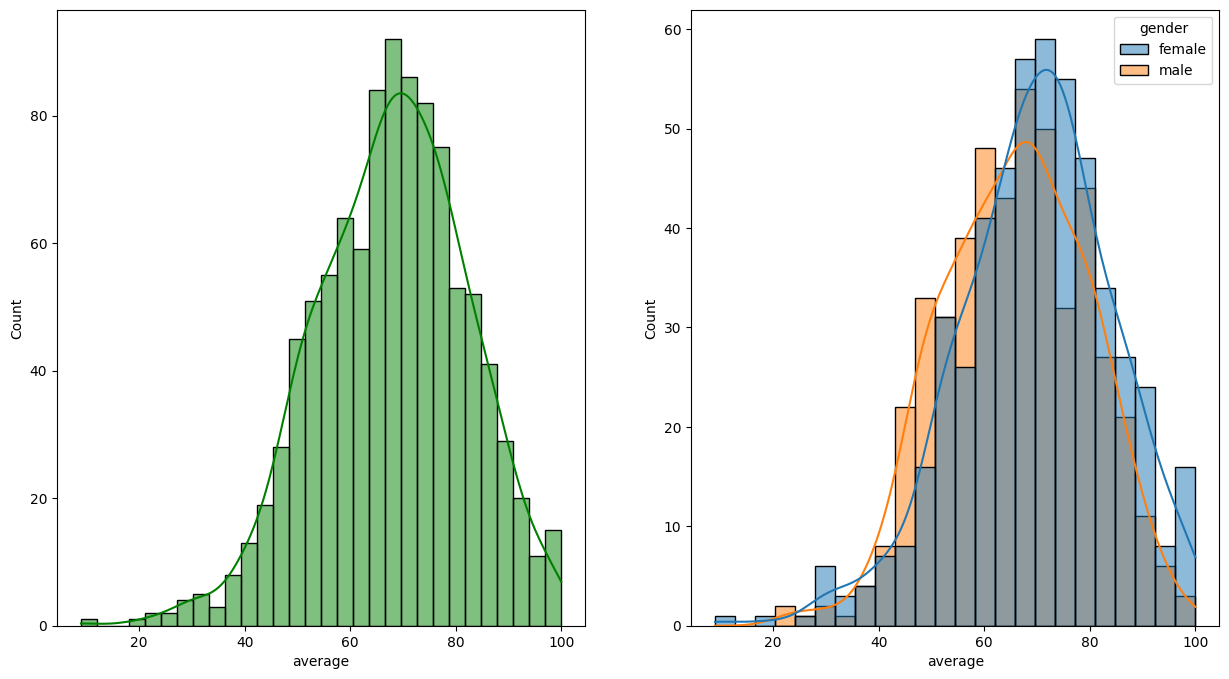

In [27]:
fig, axs = plt.subplots(1, 2, figsize = (15, 8))
plt.subplot(121)
sns.histplot(data = df, x = 'average', bins = 30, kde = True, color = 'g')

plt.subplot(122)
sns.histplot(data = df, x = 'average', hue = 'gender', kde = True)

<Axes: xlabel='average', ylabel='Count'>

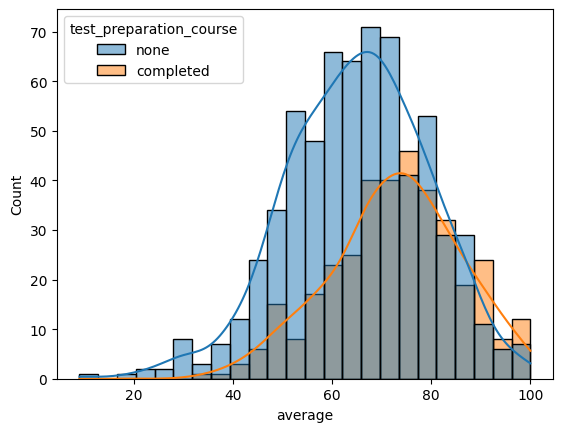

In [28]:
sns.histplot(data = df, x = 'average', hue = 'test_preparation_course', kde = True)

In [29]:
df[df['test_preparation_course'] == 'none'].describe()

,math_score,reading_score,writing_score,total_score,average
count,642.000000,642.000000,642.000000,642.000000,642.000000
mean,64.077882,66.534268,64.504673,195.116822,65.038941
std,15.192376,14.463885,14.999661,42.560121,14.186707
min,0.000000,17.000000,10.000000,27.000000,9.000000
25%,54.000000,57.000000,54.000000,166.250000,55.416667
50%,64.000000,67.000000,65.000000,196.000000,65.333333
75%,74.750000,76.000000,74.000000,225.000000,75.000000
max,100.000000,100.000000,100.000000,300.000000,100.000000


In [30]:
df[df['test_preparation_course'] == 'completed'].describe()

,math_score,reading_score,writing_score,total_score,average
count,358.000000,358.000000,358.000000,358.000000,358.000000
mean,69.695531,73.893855,74.418994,218.008380,72.669460
std,14.444699,13.638384,13.375335,39.110881,13.036960
min,23.000000,37.000000,36.000000,103.000000,34.333333
25%,60.000000,65.000000,66.000000,195.000000,65.000000
50%,69.000000,75.000000,76.000000,220.500000,73.500000
75%,79.000000,84.000000,83.000000,246.500000,82.166667
max,100.000000,100.000000,100.000000,300.000000,100.000000


Students completing the test prepration course are performing better than the students who did not.

In [31]:
df[df['lunch'] == 'standard'].describe()

,math_score,reading_score,writing_score,total_score,average
count,645.000000,645.000000,645.000000,645.000000,645.000000
mean,70.034109,71.654264,70.823256,212.511628,70.837209
std,13.653501,13.830602,14.339487,39.559515,13.186505
min,19.000000,26.000000,22.000000,78.000000,26.000000
25%,61.000000,63.000000,62.000000,187.000000,62.333333
50%,69.000000,72.000000,72.000000,214.000000,71.333333
75%,80.000000,82.000000,81.000000,239.000000,79.666667
max,100.000000,100.000000,100.000000,300.000000,100.000000


In [32]:
df[df['lunch'] == 'free/reduced'].describe()

,math_score,reading_score,writing_score,total_score,average
count,355.000000,355.000000,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535,186.597183,62.199061
std,15.159956,14.895339,15.433823,43.374971,14.458324
min,0.000000,17.000000,10.000000,27.000000,9.000000
25%,49.000000,56.000000,53.000000,158.500000,52.833333
50%,60.000000,65.000000,64.000000,188.000000,62.666667
75%,69.000000,75.000000,74.000000,217.500000,72.500000
max,100.000000,100.000000,100.000000,293.000000,97.666667


Students with standard lunch are performing better than students with reduced lunch

<Axes: xlabel='average', ylabel='Count'>

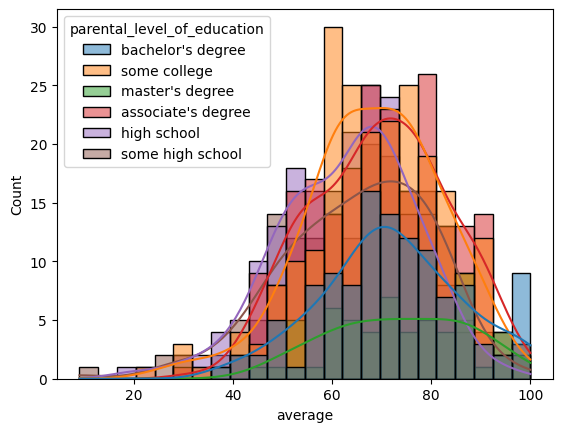

In [33]:
sns.histplot(data = df, x = 'average', hue = 'parental_level_of_education', kde = True)

higher the parental level of education higher the students score

In [44]:
for value in df['parental_level_of_education'].unique():
    print(df[df['parental_level_of_education'] == value]['average'].mean())

71.92372881355934
68.47640117994099
73.59887005649718
69.56906906906907
63.0969387755102
65.10800744878958


<Axes: xlabel='race_ethnicity', ylabel='count'>

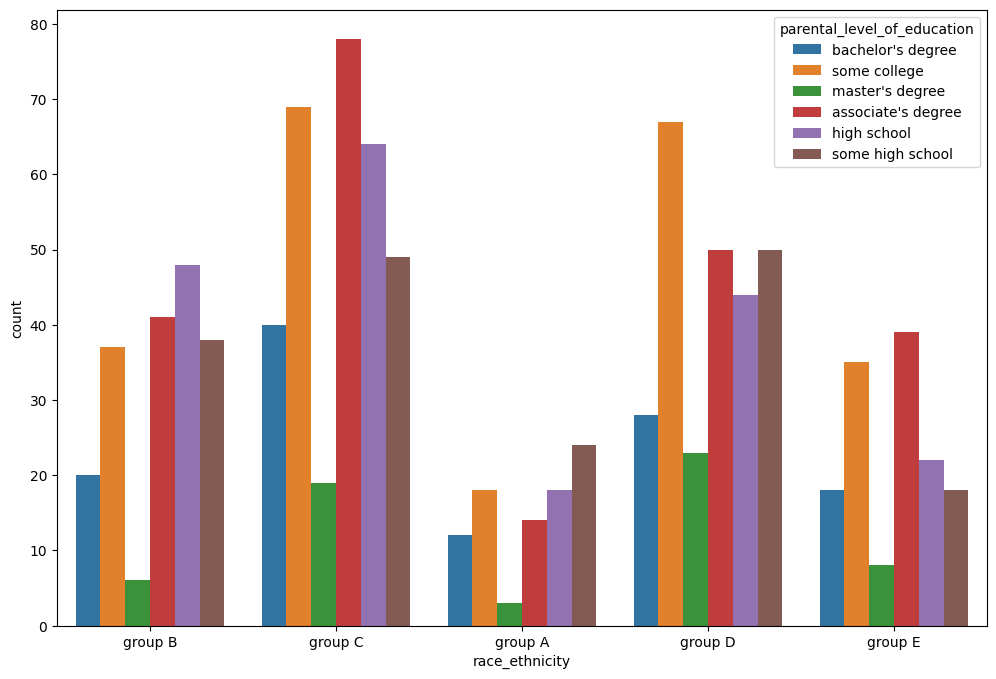

In [34]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='race_ethnicity', hue='parental_level_of_education')

<Axes: xlabel='average', ylabel='Count'>

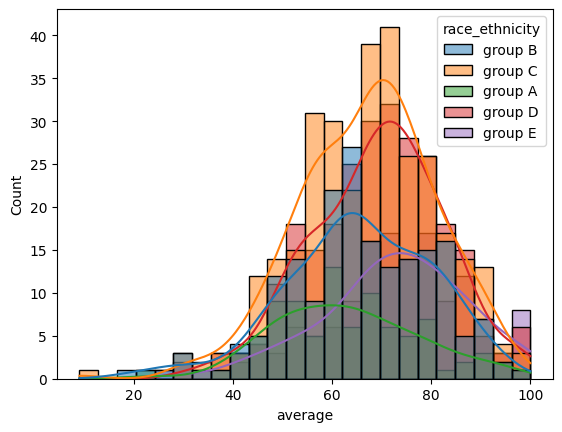

In [46]:
sns.histplot(data = df, x = 'average', hue = 'race_ethnicity', kde = True)

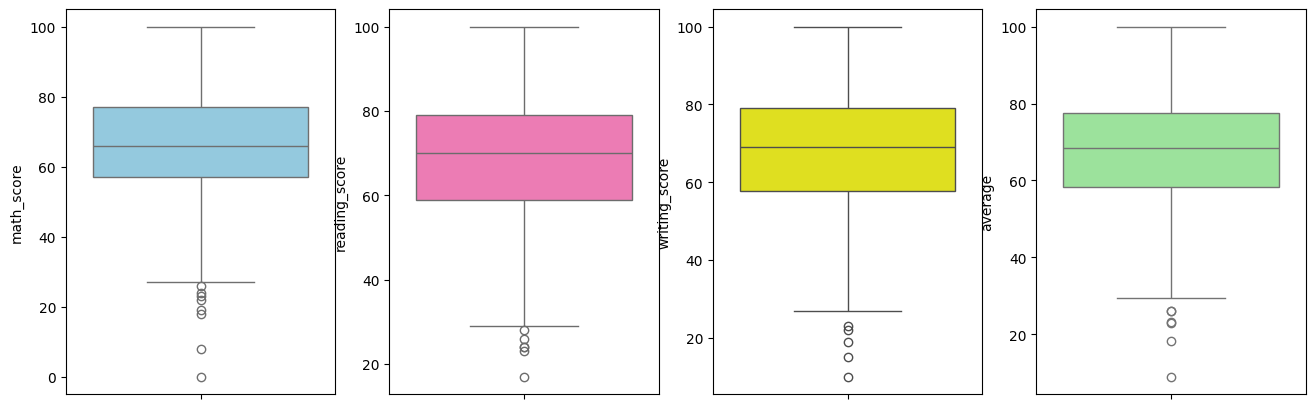

In [48]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()